In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
# loading the data
data = pd.read_excel('data.xlsx')

In [3]:
# dimensions of data set
data.shape

(5000, 14)

In [4]:
# preview the data
data.head()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,CHURN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT,Segment
0,1,2.0,3.0,1,NaN,NaN,0.0,0.0,2.0,1.0,163,NaN,NaN,Segment 1
1,2,52.0,32.0,0,3.0,2.0,1.0,0.0,0.0,966.0,76,2.0,3.0,Segment 2
2,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,0.0,Segment 3
3,4,4.0,5.0,1,NaN,NaN,3.0,0.0,5.0,5.0,107,4.0,2.0,Segment 1
4,5,0.0,14.0,0,0.0,NaN,0.0,0.0,0.0,0.0,149,6.0,2.0,Segment 5


In [5]:
# summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSCRIBER_ID         5000 non-null   int64  
 1   BNUM_OUT              4512 non-null   float64
 2   BNUM_IN               4512 non-null   float64
 3   CHURN                 5000 non-null   int64  
 4   PROD_CNT_MACRO        2175 non-null   float64
 5   REV_BUN_MAC           1023 non-null   float64
 6   REV_OUT               4492 non-null   float64
 7   USAGE_OUT_INT_DUR     4599 non-null   float64
 8   USAGE_OUT_OFFNET_DUR  4599 non-null   float64
 9   USAGE_OUT_ONNET_DUR   4599 non-null   float64
 10  LNE_TENURE            5000 non-null   int64  
 11  TOPUP_AMT             2737 non-null   float64
 12  TOPUP_CNT             3091 non-null   float64
 13  Segment               4998 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 547.0+ KB


In [6]:
# finding the categorical variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables'.format(len(categorical)))
print('Categorical variables are: ', categorical)

There are 1 categorical variables
Categorical variables are:  ['Segment']


In [7]:
# view categorical variable Segment
data[categorical]

,Segment
0,Segment 1
1,Segment 2
2,Segment 3
3,Segment 1
4,Segment 5
...,...
4995,Segment 1
4996,Segment 2
4997,Segment 5
4998,Segment 3


In [8]:
# missing values in Segment variable
data[categorical].isnull().sum()

Segment    2
dtype: int64

In [9]:
# labels within Segment variable
print(len(data['Segment'].unique()), ' class')

5  class


In [10]:
# finding the numerical variables
numerical = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))
print('Numerical variables are: ', numerical)

There are 13 numerical variables
Numerical variables are:  ['SUBSCRIBER_ID', 'BNUM_OUT', 'BNUM_IN', 'CHURN', 'PROD_CNT_MACRO', 'REV_BUN_MAC', 'REV_OUT', 'USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR', 'USAGE_OUT_ONNET_DUR', 'LNE_TENURE', 'TOPUP_AMT', 'TOPUP_CNT']


In [11]:
# viewing the numerical variables
data[numerical].head()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,CHURN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT
0,1,2.0,3.0,1,NaN,NaN,0.0,0.0,2.0,1.0,163,NaN,NaN
1,2,52.0,32.0,0,3.0,2.0,1.0,0.0,0.0,966.0,76,2.0,3.0
2,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,0.0
3,4,4.0,5.0,1,NaN,NaN,3.0,0.0,5.0,5.0,107,4.0,2.0
4,5,0.0,14.0,0,0.0,NaN,0.0,0.0,0.0,0.0,149,6.0,2.0


In [12]:
# missing values in numerical variables
data[numerical].isnull().sum().sort_values(ascending = False)

REV_BUN_MAC             3977
PROD_CNT_MACRO          2825
TOPUP_AMT               2263
TOPUP_CNT               1909
REV_OUT                  508
BNUM_OUT                 488
BNUM_IN                  488
USAGE_OUT_INT_DUR        401
USAGE_OUT_OFFNET_DUR     401
USAGE_OUT_ONNET_DUR      401
SUBSCRIBER_ID              0
CHURN                      0
LNE_TENURE                 0
dtype: int64

In [13]:
# summary statistics in the numerical variables
print(round(data[numerical].describe()),2)

       SUBSCRIBER_ID  BNUM_OUT  BNUM_IN   CHURN  PROD_CNT_MACRO  REV_BUN_MAC  \
count         5000.0    4512.0   4512.0  5000.0          2175.0       1023.0   
mean          2500.0      10.0     15.0     0.0             1.0          4.0   
std           1444.0      14.0     18.0     0.0             2.0          3.0   
min              1.0       0.0      0.0     0.0             0.0          1.0   
25%           1251.0       1.0      4.0     0.0             0.0          1.0   
50%           2500.0       5.0      9.0     0.0             0.0          3.0   
75%           3750.0      13.0     19.0     0.0             2.0          5.0   
max           5000.0     158.0    445.0     1.0            18.0         28.0   

       REV_OUT  USAGE_OUT_INT_DUR  USAGE_OUT_OFFNET_DUR  USAGE_OUT_ONNET_DUR  \
count   4492.0             4599.0                4599.0               4599.0   
mean       2.0                1.0                   8.0                 80.0   
std        5.0               11.0      

Text(0, 0.5, 'Number of outgoing minutes in the network')

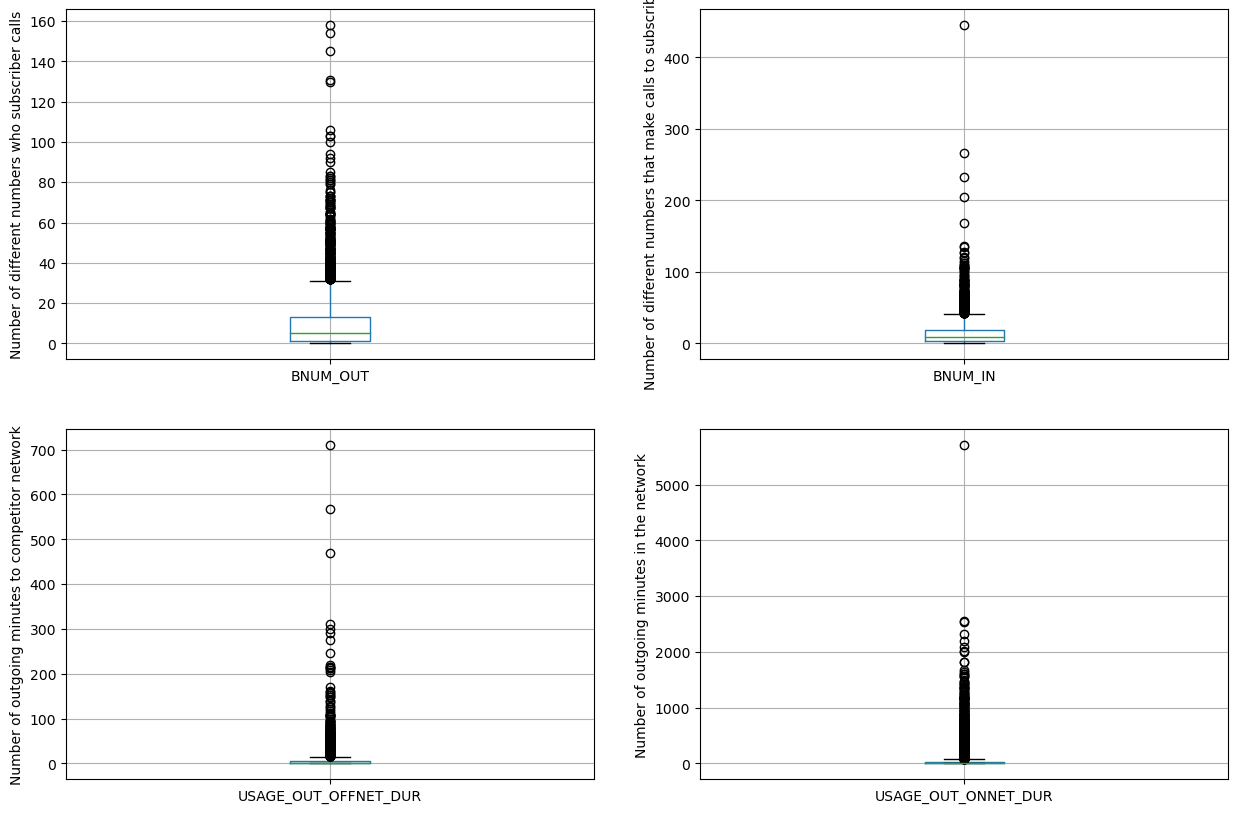

In [14]:
# boxplots for visualising outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column='BNUM_OUT')
fig.set_title('')
fig.set_ylabel('Number of different numbers who subscriber calls')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='BNUM_IN')
fig.set_title('')
fig.set_ylabel('Number of different numbers that make calls to subscriber')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='USAGE_OUT_OFFNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes to competitor network')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='USAGE_OUT_ONNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes in the network')

In [15]:
# number of outliers for each column
outliers_count = {}
for column in data.columns:
    if data[column].dtype != 'O' and column != 'CHURN':
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for identifying outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers for the current column
        num_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

        # Store the count in the dictionary
        outliers_count[column] = num_outliers
# Print the number of outliers for each column
print("Number of outliers for each column:")
for column, count in outliers_count.items():
    ratio = count/data.shape[0] * 100 
    print(f"{column}: {count}, percentage of all entries: {ratio:.2f}%", )
# print('Number of rows ', data.shape[0])

Number of outliers for each column:
SUBSCRIBER_ID: 0, percentage of all entries: 0.00%
BNUM_OUT: 303, percentage of all entries: 6.06%
BNUM_IN: 265, percentage of all entries: 5.30%
PROD_CNT_MACRO: 19, percentage of all entries: 0.38%
REV_BUN_MAC: 29, percentage of all entries: 0.58%
REV_OUT: 368, percentage of all entries: 7.36%
USAGE_OUT_INT_DUR: 296, percentage of all entries: 5.92%
USAGE_OUT_OFFNET_DUR: 591, percentage of all entries: 11.82%
USAGE_OUT_ONNET_DUR: 837, percentage of all entries: 16.74%
LNE_TENURE: 4, percentage of all entries: 0.08%
TOPUP_AMT: 187, percentage of all entries: 3.74%
TOPUP_CNT: 188, percentage of all entries: 3.76%


Text(0.5, 0, 'Number of outgoing minutes in the network')

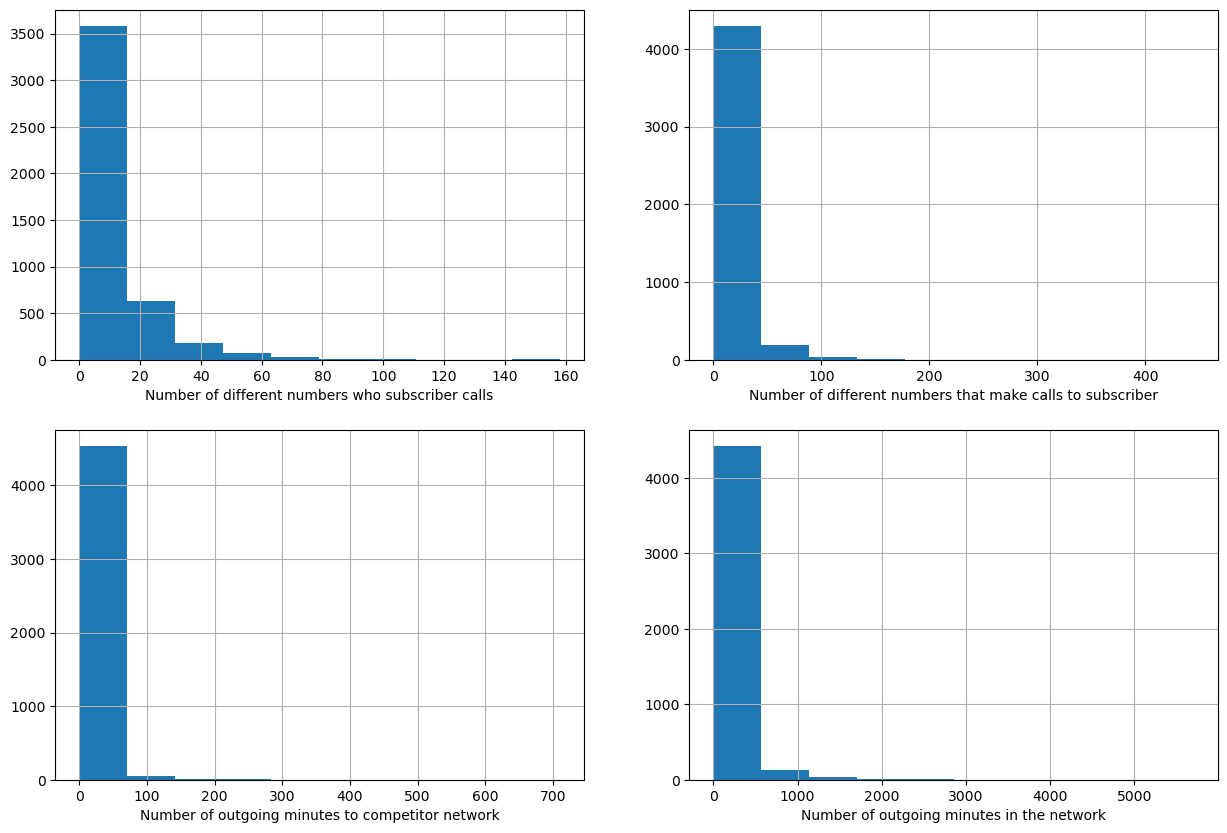

In [16]:
# plotting histograms to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.BNUM_OUT.hist(bins=10)
fig.set_xlabel('Number of different numbers who subscriber calls')


plt.subplot(2, 2, 2)
fig = data.BNUM_IN.hist(bins=10)
fig.set_xlabel('Number of different numbers that make calls to subscriber')


plt.subplot(2, 2, 3)
fig = data.USAGE_OUT_OFFNET_DUR.hist(bins=10)
fig.set_xlabel('Number of outgoing minutes to competitor network')


plt.subplot(2, 2, 4)
fig = data.USAGE_OUT_ONNET_DUR.hist(bins=10)
fig.set_xlabel('Number of outgoing minutes in the network')


In [17]:
# handling missing values in the same way as in Script file
# erasing columns REV_BUN_MAC, PROD_CNT_MACRO,TOPUP_AMT, TOPUP_CNT because there are too many missing values
data = data.drop(['REV_BUN_MAC','PROD_CNT_MACRO','TOPUP_AMT','TOPUP_CNT'], axis = 1)
# filling the missing value for Segment variable with most frequent value in that column
most_frequent = data.Segment.mode()[0]
data.Segment = data.Segment.fillna(most_frequent)
# eliminating rows with missing values for columns USAGE_OUT_INT_DUR, USAGE_OUT_OFFNET_DUR, USAGE_OUT_ONNET_DUR
data = data.dropna(subset = ['USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR','USAGE_OUT_ONNET_DUR'])
# checking for remaining missing values
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_OUT                 107
BNUM_OUT                 87
BNUM_IN                  87
SUBSCRIBER_ID             0
CHURN                     0
USAGE_OUT_INT_DUR         0
USAGE_OUT_OFFNET_DUR      0
USAGE_OUT_ONNET_DUR       0
LNE_TENURE                0
Segment                   0
dtype: int64

In [18]:
# applying shapiro test
from scipy.stats import shapiro

columns_shapiro = ['REV_OUT','BNUM_OUT','BNUM_IN']
p_values = data[columns_shapiro].apply(lambda x: shapiro(x)[1])

rev_mean = data.REV_OUT.mean()
bnum_out_mean = data.BNUM_OUT.mean()
bnum_in_mean = data.BNUM_IN.mean()

# filling missing values for REV_OUT, BNUM_OUT and BNUM_IN with mean values for their column
data.loc[:, 'REV_OUT'] = data['REV_OUT'].fillna(rev_mean)
data.loc[:, 'BNUM_OUT'] = data['BNUM_OUT'].fillna(bnum_out_mean)
data.loc[:, 'BNUM_IN'] = data['BNUM_IN'].fillna(bnum_in_mean)

print(data.isna().sum().sort_values(ascending = False))

SUBSCRIBER_ID           0
BNUM_OUT                0
BNUM_IN                 0
CHURN                   0
REV_OUT                 0
USAGE_OUT_INT_DUR       0
USAGE_OUT_OFFNET_DUR    0
USAGE_OUT_ONNET_DUR     0
LNE_TENURE              0
Segment                 0
dtype: int64


In [19]:
# proportion of values in outcome variable CHURN
data['CHURN'].value_counts()/len(data) * 100
# inbalanced data set

CHURN
0    76.364427
1    23.635573
Name: count, dtype: float64

In [20]:
# examining linear correlation between variables and variable CHURN
from scipy.stats import pointbiserialr
for column in data.columns:
    if column != 'CHURN' and column != 'Segment':
        corr, p_value = pointbiserialr(data.CHURN, data[column])
        print(f"Point-Biserial correlation between CHURN and {column}: {corr: .2f}")
        print(f"P-value: {p_value: .4f}")
# there are statistically important linear correlations between numerical independent variables and dependent variable CHURN

Point-Biserial correlation between CHURN and SUBSCRIBER_ID:  0.04
P-value:  0.0161
Point-Biserial correlation between CHURN and BNUM_OUT: -0.21
P-value:  0.0000
Point-Biserial correlation between CHURN and BNUM_IN: -0.26
P-value:  0.0000
Point-Biserial correlation between CHURN and REV_OUT: -0.11
P-value:  0.0000
Point-Biserial correlation between CHURN and USAGE_OUT_INT_DUR: -0.01
P-value:  0.3690
Point-Biserial correlation between CHURN and USAGE_OUT_OFFNET_DUR: -0.07
P-value:  0.0000
Point-Biserial correlation between CHURN and USAGE_OUT_ONNET_DUR: -0.14
P-value:  0.0000
Point-Biserial correlation between CHURN and LNE_TENURE: -0.05
P-value:  0.0004


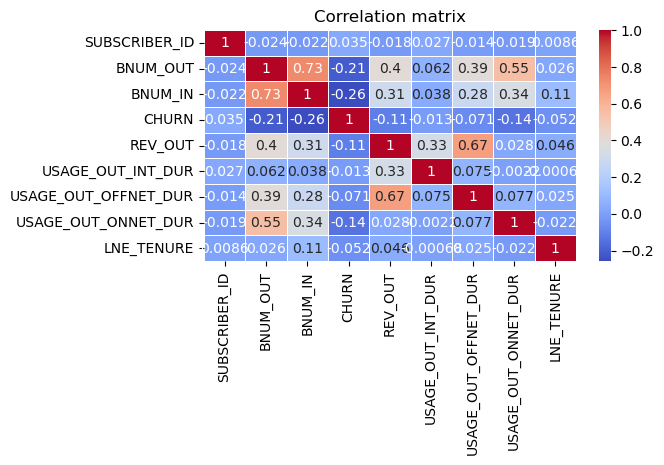

In [21]:
# checking for multicollinearity
numerical_data = data.drop('Segment', axis=1)
corr_matrix = numerical_data.corr()
# visualizing corr_matrix
plt.figure(figsize = (6,3))
sn.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation matrix')
plt.show()
# no multicollinearity

In [28]:
# handling outliers
from scipy.stats.mstats import winsorize
import copy
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="numpy.lib.function_base")

winsorized_data = copy.deepcopy(data)
winsorized_data = winsorized_data.select_dtypes(include = ['number'])
winsorized_data = winsorized_data.drop(['SUBSCRIBER_ID','CHURN'], axis = 1)
# winsorized_data = np.array(winsorized_data)
winsorized_data
columns = winsorized_data.columns
# columns
for column in columns:
    if column == 'USAGE_OUT_OFFNET_DUR':
        winsorized_data[column] = np.asarray(winsorized_data[column])
        winsorized_data[column] = winsorize(winsorized_data[column], limits=[0.15, 0.15])
    elif column == 'USAGE_OUT_ONNET_DUR':
        winsorized_data[column] = np.asarray(winsorized_data[column])
        winsorized_data[column] = winsorize(winsorized_data[column], limits=[0.20, 0.20])    
    else:
        winsorized_data[column] = np.asarray(winsorized_data[column])
        winsorized_data[column] = winsorize(winsorized_data[column], limits=[0.09, 0.09])

print("Original data:")
print(data.describe())
print("Winsorized data:")
print(winsorized_data.describe())

Original data:
       SUBSCRIBER_ID     BNUM_OUT      BNUM_IN        CHURN      REV_OUT  \
count    4599.000000  4599.000000  4599.000000  4599.000000  4599.000000   
mean     2511.114590     9.847961    14.552527     0.236356     2.484862   
std      1446.119094    13.637222    18.027042     0.424889     5.116689   
min         1.000000     0.000000     0.000000     0.000000     0.000000   
25%      1264.000000     1.000000     4.000000     0.000000     0.000000   
50%      2511.000000     5.000000    10.000000     0.000000     1.000000   
75%      3770.500000    13.000000    19.000000     0.000000     3.000000   
max      5000.000000   158.000000   445.000000     1.000000    82.000000   

       USAGE_OUT_INT_DUR  USAGE_OUT_OFFNET_DUR  USAGE_OUT_ONNET_DUR  \
count        4599.000000           4599.000000          4599.000000   
mean            0.921505              7.699935            79.876236   
std            10.959876             24.665487           232.314367   
min             

In [29]:
# number of outliers for each column
warnings.filterwarnings("ignore", category=UserWarning, module="numpy.lib.function_base")

outliers_count = {}
for column in winsorized_data.columns:
        Q1 = winsorized_data[column].quantile(0.25)
        Q3 = winsorized_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        num_outliers = ((winsorized_data[column] < lower_bound) | (winsorized_data[column] > upper_bound)).sum()
        outliers_count[column] = num_outliers
        
print("Number of outliers for each column:")
for column, count in outliers_count.items():
    ratio = count/data.shape[0] * 100 
    print(f"{column}: {count}, percentage of all entries: {ratio:.2f}%", )
# print('Number of rows ', data.shape[0])

Number of outliers for each column:
BNUM_OUT: 0, percentage of all entries: 0.00%
BNUM_IN: 0, percentage of all entries: 0.00%
REV_OUT: 0, percentage of all entries: 0.00%
USAGE_OUT_INT_DUR: 0, percentage of all entries: 0.00%
USAGE_OUT_OFFNET_DUR: 0, percentage of all entries: 0.00%
USAGE_OUT_ONNET_DUR: 0, percentage of all entries: 0.00%
LNE_TENURE: 0, percentage of all entries: 0.00%


Text(0, 0.5, 'Number of outgoing minutes in the network')

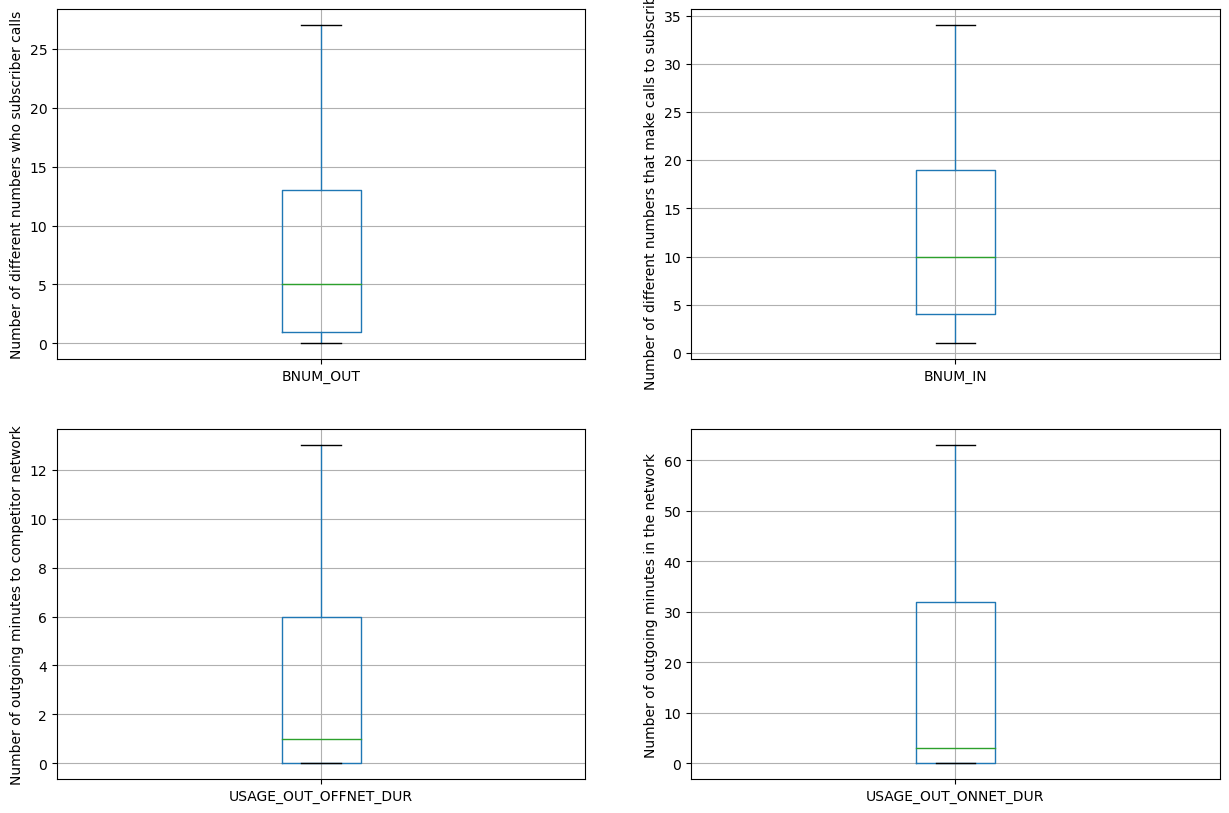

In [30]:
# boxplots for visualising outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = winsorized_data.boxplot(column='BNUM_OUT')
fig.set_title('')
fig.set_ylabel('Number of different numbers who subscriber calls')


plt.subplot(2, 2, 2)
fig = winsorized_data.boxplot(column='BNUM_IN')
fig.set_title('')
fig.set_ylabel('Number of different numbers that make calls to subscriber')


plt.subplot(2, 2, 3)
fig = winsorized_data.boxplot(column='USAGE_OUT_OFFNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes to competitor network')


plt.subplot(2, 2, 4)
fig = winsorized_data.boxplot(column='USAGE_OUT_ONNET_DUR')
fig.set_title('')
fig.set_ylabel('Number of outgoing minutes in the network')

In [35]:
# Declaring feature vector and target variable
X = winsorized_data
X
# target variable CHURN
y = data['CHURN']
y

0       1
1       0
3       1
4       0
5       0
       ..
4995    1
4996    0
4997    0
4998    0
4999    1
Name: CHURN, Length: 4599, dtype: int64

In [ ]:
# splitting X and y sets in training and testing sets
# from sklearn. 

In [ ]:
# pairplots
# plt.figure(figsize=(20,20))

# sn.pairplot(data, hue = 'CHURN')

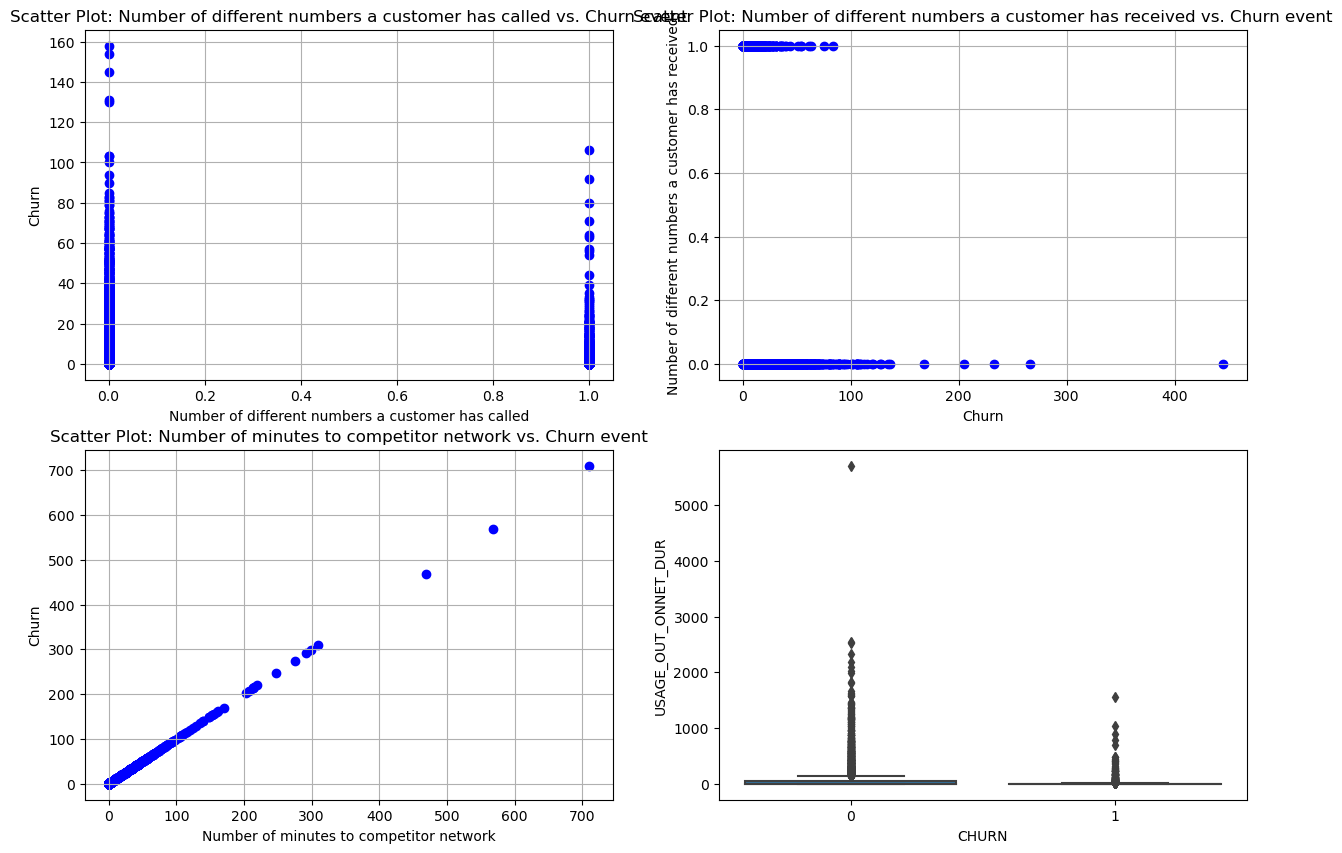

In [31]:
# # checking for linear correlation between predictor variables and variable CHURN
# plt.figure(figsize=(15,10))

# plt.subplot(2, 2, 1)
# plt.scatter(data.CHURN, data.BNUM_OUT, color='blue', marker='o')
# plt.title('Scatter Plot: Number of different numbers a customer has called vs. Churn event')
# plt.xlabel('Number of different numbers a customer has called')
# # plt.ylabel('Churn')
# plt.grid(True)

# plt.subplot(2, 2, 2)
# plt.scatter(data.BNUM_IN, data.CHURN, color='blue', marker='o')
# plt.title('Scatter Plot: Number of different numbers a customer has received vs. Churn event')
# plt.ylabel('Number of different numbers a customer has received')
# plt.xlabel('Churn')
# plt.grid(True)

# plt.subplot(2, 2, 3)
# plt.scatter(data.USAGE_OUT_OFFNET_DUR, data.USAGE_OUT_OFFNET_DUR, color='blue', marker='o')
# plt.title('Scatter Plot: Number of minutes to competitor network vs. Churn event')
# plt.xlabel('Number of minutes to competitor network')
# plt.ylabel('Churn')
# plt.grid(True)

# plt.subplot(2, 2, 4)
# sn.boxplot(x='CHURN', y='USAGE_OUT_ONNET_DUR', data=data)
# plt.show()
# # plt.scatter(data.USAGE_OUT_ONNET_DUR, data.USAGE_OUT_ONNET_DUR, color='blue', marker='o')
# # plt.title('Scatter Plot: Number of minutes in the network vs. Churn event')
# # plt.xlabel('Number of minutes in the network')
# # plt.ylabel('Churn')
# # plt.grid(True)
